**GRADIENT DESCENT ALGORITHM**

**DEVELOPING A GD ALGORITHM FOR LINEAR REGRESSION MODEL**

**Loading the Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
sales_df = pd.read_csv('Advertising.csv')
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Set X and Y variables**

In [4]:
X = sales_df[['TV', 'Radio', 'Newspaper']]
Y = sales_df['Sales']

**Standardize X and Y**

It is important to convert all variables into one scale. This can be done by subtracting mean of each value of the varaible and dividing by the corresponding standard deviation of the variable.

In [5]:
Y = np.array((Y - Y.mean()) / Y.std())
X = X.apply(lambda rec: (rec - rec.mean()) / rec.std(), axis=0)

**Implementing the Gradient Descent Algorithm**

To implement the GD, a set of following utility methods need to be implemented:
1. Method 1: Method to randomly initialize the bias and weights.
2. Method 2: Method to calculate the predicted value of Y, that is, Y given the bias and weights.
3. Method 3: Method to calculate the cost function from predicted and actual values of Y.
4. Method 4: Method to calculate the gradients and adjust the bias and weights.

**Method 1: Random Initialization of the Bias and Weights**

In [6]:
import random

# dim - is the numebr of weights to be initialized besides the bias.

def initialize(dim):
    np.random.seed(seed=42)
    random.seed(42)

    # Intialize the bias.
    b = random.random()

    # Intialize the weights.
    w = np.random.rand(dim)

    return b, w

To initialize the bias and 3 weights, as we have three input variables `TV`, `Radio` and `Newspaper`, we can invoke the initialize() method as follows:

In [7]:
# b, w = initialize(3)
# print("Bias: ", b, "Weights: ", w)

**Method 2: Predict Y values from the Bias and Weights**

In [8]:
def predict_Y(b, w, X):
    return b + np.matmul(X, w)

**Method 3: Calculate the Cost Function - MSE**

Computed mean squared error (MSE) by
1. Calculating differences between the estimated `Y_hat` and actual `Y`.
2. Calculating the square of the above residuals, and sum over all records.
3. Dividing it with the number of observations.

In [9]:
import math

# Inputs
# Y - Actual values of y
# Y-hat - predicted value of y
def get_cost(Y, Y_hat):
    # Calculating the residuals - difference between actual and predicted values.
    Y_resid = Y - Y_hat

    # Matrix Multiplication with self will give the square values. Then take the sum
    # and divide by number of examples to calculate mean
    return np.sum(np.matmul(Y_resid.T, Y_resid)) / len(Y_resid)

**Method 4: Update the Bias and Weights**

In [10]:
def update_beta(x, y, y_hat, b_0, w_0, learning_rate):

    # gradient of bias
    db = (np.sum(y_hat - y) * 2) / len(y)

    # gradient of weights
    dw = (np.dot((y_hat - y), x) * 2) / len(y)

    # update bias
    b_1 = b_0 - learning_rate * db

    # update beta
    w_1 = w_0 - learning_rate * dw

    # return the new bias and beta values
    return b_1, w_1

**Finding the Optimal Bias and Weights**

1. Run a fixed number of iterations and use the bias and weights as optimal values at the end these iterations.
2. Run iterations until the change in cost is small, that is, less than a predefined value (e.g., 0.001)

In [11]:
def run_gradient_descent(X, Y, alpha=0.01, num_iterations=100):

    # Intialize the bias and weights
    b, w = initialize(X.shape[1])

    iter_num = 0

    # gd_iterations_df keeps track of the cost every 10 iterations
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'])
    result_idx = 0

    # Run the iterations in loop
    for each_iter in range(num_iterations):

        # Calculate predicted value of y
        Y_hat = predict_Y(b, w, X)

        # Calculate the cost
        this_cost = get_cost(Y, Y_hat)

        # Save the previous bias and weights
        prev_b = b
        prev_w = w

        # Update and calculate the new values of bias and weights
        b, w = update_beta(X, Y, Y_hat, prev_b, prev_w, alpha)

        # For every 10 iterations, store the cost i.e. MSE
        if(iter_num % 10 == 0):
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx = result_idx + 1

        iter_num += 1

    print("Final estimate of b and w: ", b, w)

    # return the final bias, weights and the cost at the end
    return gd_iterations_df, b, w

In [12]:
gd_iterations_df, b, w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=200)

Final estimate of b and w:  0.4284489581739146 [0.48270238 0.75265969 0.46109174]


In [13]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,1.530310
1,10.0,1.465201
2,20.0,1.403145
3,30.0,1.343996
4,40.0,1.287615
5,50.0,1.233868
6,60.0,1.182630
7,70.0,1.133780
8,80.0,1.087203
9,90.0,1.042793


**Plotting the Cost Function against the Iterations**

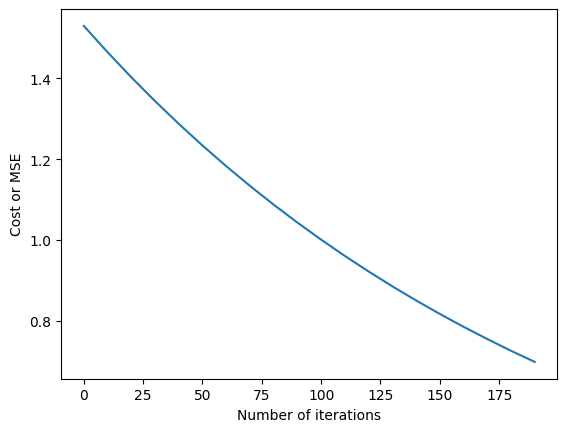

In [14]:
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel("Cost or MSE")
plt.show()

From the plot, it can be seen that the cost is still reducing and has not reached the minimum point. We can run more iterations and verify if the cost is reaching a minimum point or not.

In [15]:
alpha_df_1, b, w = run_gradient_descent(X, Y, alpha=0.01, num_iterations=2000)

Final estimate of b and w:  -4.125293727283968e-17 [ 0.75306591  0.53648155 -0.00433069]


In [16]:
alpha_df_2, b, w = run_gradient_descent(X, Y, alpha=0.001, num_iterations=2000)

Final estimate of b and w:  0.011664695556930216 [0.74315125 0.52779959 0.01171703]


Text(0.5, 1.0, 'Cost VS. Iterations for different alpha values')

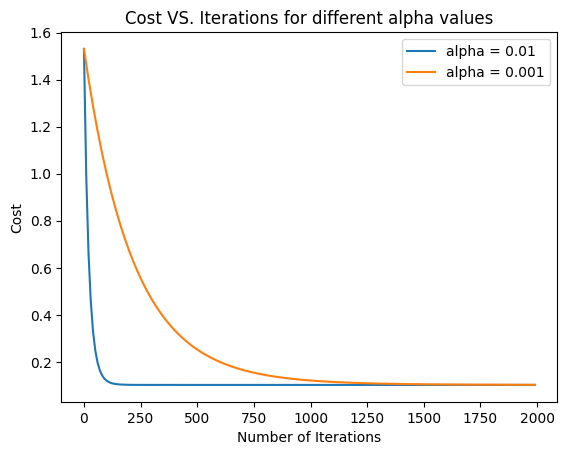

In [17]:
plt.plot(alpha_df_1['iteration'], alpha_df_1['cost'], label="alpha = 0.01")
plt.plot(alpha_df_2['iteration'], alpha_df_2['cost'], label="alpha = 0.001")
plt.legend()
plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.title("Cost VS. Iterations for different alpha values")

The learning is faster for `alpha` value 0.01 compared to 0.001. For smaller values, the learning could be slower whereas higher learning rate could lead to skipping the minima of cost function. It is imperative to search for the optimal learning parameter.

**SCIKIT-LEARN LIBRARY FOR MACHINE LEARNING**

**Steps for Building Machine Learning Models**
1. Identify the features and outcome variable in the dataset.
2. Split the dataset into training and test sets.
3. Build the model using training set.
4. Predict outcome variable using a test set.
5. Compare the predicted and actual values of the outcome variable in the test set and measure accuracy using measures such as mean absolute percentage error (MAPE) or root mean square error (RMSE)

**Splitting Dataset into Train and Test Datasets**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sales_df[["TV", "Radio", "Newspaper"]], sales_df.Sales, test_size=0.3, random_state=42)

In [19]:
len(X_train)

140

In [20]:
len(X_test)

60

**Building Linear Regression Model with Train Dataset**

In [21]:
from sklearn.linear_model import LinearRegression

# Initializing the model
linreg = LinearRegression()

# Fitting training data to the model
linreg.fit(X_train, y_train)

LinearRegression()

In [22]:
linreg.intercept_

np.float64(2.7089490925159065)

In [23]:
linreg.coef_

array([0.04405928, 0.1992875 , 0.00688245])

To associate the coefficient values with the variable names, we can use `zip()` in Python. `zip()` returns a dictionary with variable names mapped to coefficient values.

In [24]:
list(zip(["TV", "Radio", "Newspaper"], list(linreg.coef_)))

[('TV', np.float64(0.04405928095746522)),
 ('Radio', np.float64(0.19928749689893954)),
 ('Newspaper', np.float64(0.006882452222275487))]

The estimated model is 
            
            Sales = 2.708 + 0.044 * TV + 0.199 * Radio + 0.006 * Newspaper

**Making Prediction on Test Set**

In [25]:
# Predicting the y value from the test set
y_pred = linreg.predict(X_test)

# Creating DataFrame with 3 columns named: actual, predict and residuals
# to store the respective values
test_pred_df = pd.DataFrame({'actual': y_test, 'predicted': np.round(y_pred, 2),  'residuals': y_test - y_pred})

# Randomly showing the 10 observations
test_pred_df.sample(10)

,actual,predicted,residuals
126,6.6,11.15,-4.553147
170,8.4,7.35,1.049715
95,16.9,16.57,0.334604
195,7.6,5.22,2.375645
115,12.6,13.36,-0.755569
38,10.1,10.17,-0.070454
56,5.5,8.92,-3.415494
165,11.9,14.30,-2.402060
173,11.7,11.63,0.068431
9,10.6,12.18,-1.576049


**Measuring Accuracy**

Root Mean Square Error (RMSE) and R-squared are two key accuracy measures for Linear Regression Models.

**R-Squared Value**

In [26]:
from sklearn import metrics
# y_train contains the actual value and the predicted value is returned from predict()
# method after passing the X values of the training data.
r2 = metrics.r2_score(y_train, linreg.predict(X_train))
print("R Squared: ", r2)

R Squared:  0.9055159502227753


The model explains 90% of the variance in Y.

**RMSE Calculation**

In [27]:
# y_pred contains predicted value of test data
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse), 2)
print("RMSE", rmse)

RMSE 1.95


This indicates the model prediction has a standard deviation of 1.95.

**Bias-Variance Trade-Off**

High bias can lead to building underfitting model, whereas high variance can lead to overfitting models.

In [28]:
curve = pd.read_csv('curve.csv')
curve.head()

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


In [29]:
curve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       50 non-null     int64  
 1   y       50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 932.0 bytes


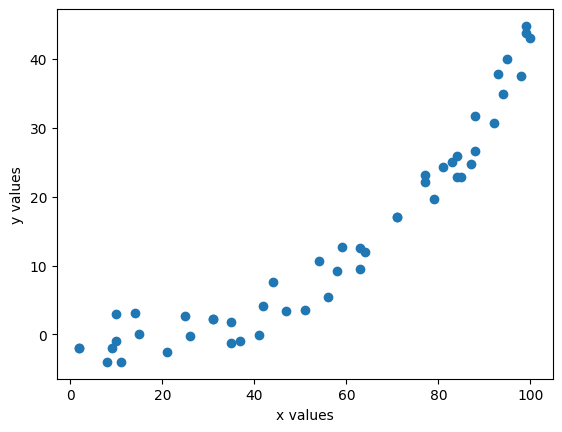

In [30]:
plt.scatter(curve.x, curve.y)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

It can be observed from the Scatter Plot that the relation between y and x is not linear and looks like some polynomial. But we are not sure of the degree of the polynomial form. We need to try various polynomial forms of x and evrify which model fits the data best.

In [31]:
# degree - polynomial terms to be used in the model
def fit_poly(degree):
    # calling numpy method polyfit
    p = np.polyfit(curve.x, curve.y, deg=degree)
    curve['fit'] = np.polyval(p, curve.x)

    # draw the regression line after fitting the model
    sn.regplot(x=curve.x, y=curve.y, fit_reg=False)

    # Plot the actual x and y values
    return plt.plot(curve.x, curve.fit, label='fit')

Fitting a mode with degree = 1

$y = \beta_1 \cdot x_1 + \varepsilon_1$

Text(0, 0.5, 'y values')

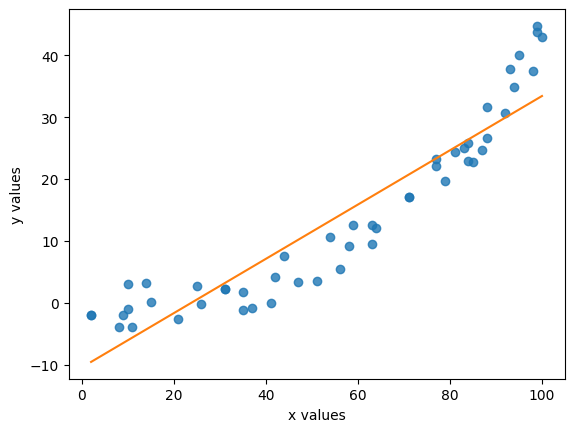

In [32]:
fit_poly(1)
plt.xlabel("x values")
plt.ylabel("y values")

The Linear model eveidently shows that the regression model does not seem to fit the data well. This is underfitting or bias.

Let us do for a polynomial term, that is, in square of x

$y = \beta_1 \cdot x_1 + \beta_2 \cdot x^2_2 + \varepsilon_1$

Text(0, 0.5, 'y values')

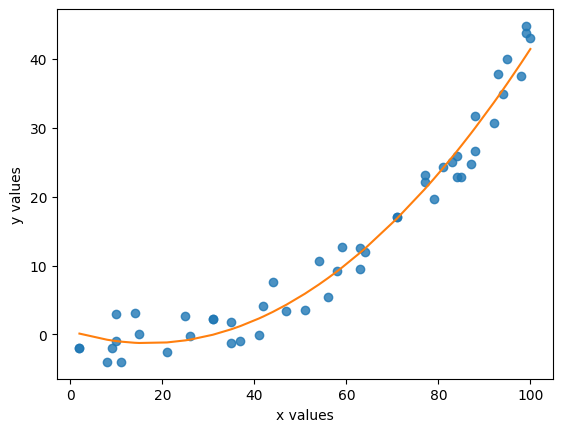

In [33]:
fit_poly(2)
plt.xlabel("x values")
plt.ylabel("y values")

Now we try with a polynomial of degree 10.

Text(0, 0.5, 'y label')

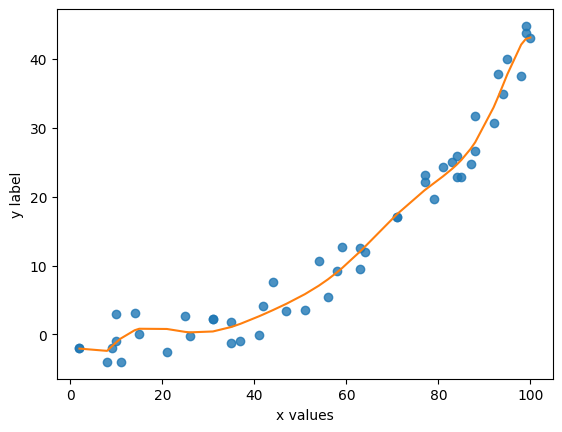

In [34]:
fit_poly(10)
plt.xlabel("x values")
plt.ylabel("y label")

An underfitting model has a large error because of high bias and an overfitting model has a large error because of high variance. An optimal model will be somewhere between an underfitting and an overfitting model, and will have low bias and low variance. This can be observed by comparing RMSE in training and test sets.

In [35]:
# split the dataset into 60:40 into training and test set
train_X, test_X, train_y, test_y = train_test_split(curve.x, curve.y, test_size=0.40, random_state=100)

# Define the dataframe store degree and rmse for training and test set
rmse_df = pd.DataFrame(columns=['degree', 'rmse_train', 'rmse_test'])

# Define a method to return the rmse given actual and predicted values.
def get_rmse(y, y_fit):
    return np.sqrt(metrics.mean_squared_error(y, y_fit))

# Iterate from degree 1 to 15
for i in range(1, 15):
    # fitting model
    p = np.polyfit(train_X, train_y, deg=i)

    # storing model degree and rmse on train and test set
    rmse_df.loc[i-1] = [i, get_rmse(train_y, np.polyval(p, train_X)), get_rmse(test_y, np.polyval(p, test_X))]

In [36]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,5.226638,5.779652
1,2.0,2.394509,2.755286
2,3.0,2.233547,2.560184
3,4.0,2.231998,2.549205
4,5.0,2.197528,2.428728
5,6.0,2.062201,2.703880
6,7.0,2.039408,2.909237
7,8.0,1.995852,3.270892
8,9.0,1.979322,3.120420
9,10.0,1.976326,3.115875


Now we can plot the train and test errors against the degree of the models for better understanding.

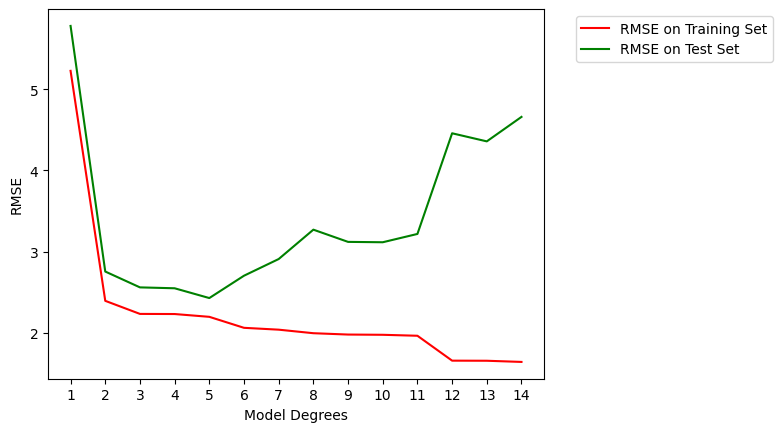

In [37]:
# Plotting the rmse for training set in red color
plt.plot(rmse_df.degree, rmse_df.rmse_train, label='RMSE on Training Set', color='r')

# Plotting the rmse for test set in green color
plt.plot(rmse_df.degree, rmse_df.rmse_test, label='RMSE on Test Set', color='g')

# Mention the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.xlabel("Model Degrees")
plt.xticks(range(1, 15))
plt.ylabel("RMSE")
plt.show()

**ADVANCED REGRESSION MODELS**

**Loading IPL dataset**

In [38]:
ipl_auction_df = pd.read_csv('IPL IMB381IPL2013.csv')
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [39]:
ipl_auction_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [40]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [41]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features], columns=categorical_features, drop_first=True)
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [43]:
X = ipl_auction_encoded_df
Y = ipl_auction_df['SOLD PRICE']

**Standardization of X and Y**

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

Y = (Y - Y.mean()) / Y.std()

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

**Building the model**

In [48]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [49]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

The sign of the coefficients indicates positive or negative effect on a player's `SOLD PRICE`. We will store the beta coefficients and respective column names in a DataFrame and sort the coefficient values in descending order to observe the effects.

In [51]:
columns_coef_df = pd.DataFrame({'columns': ipl_auction_encoded_df.columns, 'coef': linreg.coef_})
sorted_coef_vals = columns_coef_df.sort_values('coef', ascending=False)

**Plotting the Coefficient Values**

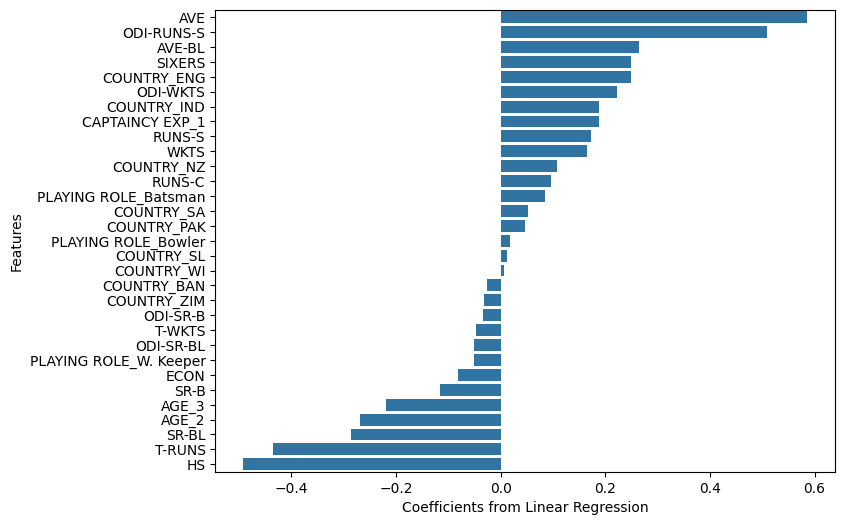

In [52]:
plt.figure(figsize=(8, 6))
sn.barplot(x="coef", y="columns", data=sorted_coef_vals)
plt.xlabel("Coefficients from Linear Regression")
plt.ylabel("Features")
plt.show()

**Calculate RMSE**

In [54]:
from sklearn import metrics

# Takes a model as a parameter and prints the RMSE on train and test set

def get_train_test_rmse(model):
    y_train_pred = model.predict(X_train)
    rmse_train = round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 3)

    y_test_pred = model.predict(X_test)
    rmse_test = round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), 3)

    print("train: ", rmse_train, "test: ", rmse_test)

get_train_test_rmse(linreg)

train:  0.679 test:  0.749


RMSE on the training set is 0.679, while it is 0.749 on the test set. A good model that generalizes well needs to have a very similar error on training and test sets. A large difference indicates that the model may be overfitting to the training set. Most widely used approach to deal with model overfitting is called *Regularization*.

**Applying Regularization**

**Ridge Regression**

In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1, max_iter=500)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=500)

In [56]:
get_train_test_rmse(ridge)

train:  0.68 test:  0.724


The difference in RMSE on train and test has reduced because of penalty effect. The difference can be reduced by apply a stronger penalty. FOr example for alpha = 2.0.

In [57]:
ridge = Ridge(alpha=2.0, max_iter=1000)
ridge.fit(X_train, y_train)
get_train_test_rmse(ridge)

train:  0.682 test:  0.706


For now, let us assume the optimal value for alpha is 2.0

**LASSO Regression**

In [58]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=500)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=500)

In [59]:
get_train_test_rmse(lasso)

train:  0.688 test:  0.698


It can be noticed that the model is not overfitting and the difference between train RMSE and test RMSE is very small. LASSO reduces some of the coeffieicent values to 0, which indicates that these features are not necessary for explaining the variance in the outcome variable.

In [62]:
lasso_coef_df = pd.DataFrame({'columns': ipl_auction_encoded_df.columns, 'coef': lasso.coef_})
lasso_coef_df[lasso_coef_df.coef == 0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0


The LASSO regression indicates that the features listed under "columns" are not influencing factors for predicting the `SOLD PRICE` as the respective coefficients are 0.0.

**Elastic Net Regression**

In [63]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=1.01, l1_ratio=0.001, max_iter=500)
enet.fit(X_train, y_train)
get_train_test_rmse(enet)

train:  0.789 test:  0.665


As we can see the Elastic Net worsened the model performace. So we use LASSO regularization in here which seems the most ideal.

**ADVANCED MACHINE LEARNING ALGORITHMS FOR CLASSIFICATION PROBLEMS**

In [64]:
bank_df = pd.read_csv('bank.csv')
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [65]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.7+ KB


In [66]:
bank_df['subscribed'].value_counts()

subscribed
no     4000
yes     521
Name: count, dtype: int64

**Dealing with imbalanced Datasets**

In case of imbalanced datasets both the classes are not equally represented. In such cases, the model may not be able to learn and may be biased towards the class that is over-represented.

One approach to deal with such imbalanced dataset is bootstrapping. It involves resampling techniques such as upsampling and downsampling.
1. Upsampling: Increase the instances of under-represented minority class by replicating existing observations in the dataset.
2. Downsampling: Reduce the instances of over-represented majority class by removing the existing observations from the dataset and is also called Undersampling

In [67]:
from sklearn.utils import resample

bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']

df_minority_upsampled = resample(bank_subscribed_yes, replace=True, n_samples=2000)
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [68]:
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

In [69]:
X_features = list(new_bank_df.columns)
X_features.remove('subscribed')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [70]:
encoded_bank_df = pd.get_dummies(new_bank_df[X_features], drop_first=True)
X = encoded_bank_df

In [71]:
Y = new_bank_df.subscribed.map(lambda x: int(x == 'yes'))

In [72]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

**Building Logistic Regression Model**

In [73]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(train_X, train_y)

LogisticRegression()

In [74]:
pred_y = logit.predict(test_X)

**Confusion Matrix**

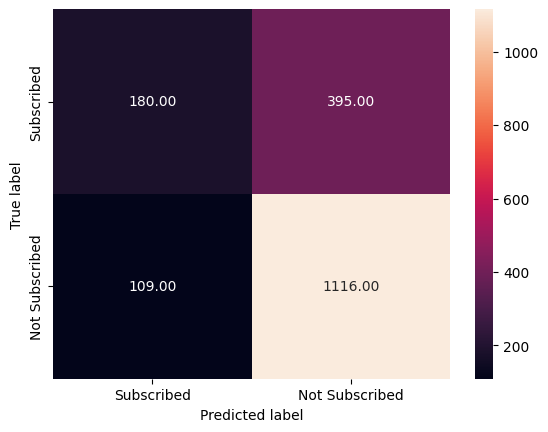

In [78]:
from sklearn import metrics

def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted, labels=[1,0])
    sn.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Subscribed", "Not Subscribed"], yticklabels = ["Subscribed", "Not Subscribed"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

cm = draw_cm(test_y, pred_y)

**Classification Report**

In [80]:
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1225
           1       0.62      0.31      0.42       575

    accuracy                           0.72      1800
   macro avg       0.68      0.61      0.62      1800
weighted avg       0.70      0.72      0.69      1800



**Plotting ROC and gettimng AUC score**

In [81]:
predict_proba_df = pd.DataFrame(logit.predict_proba(test_X))
predict_proba_df.head()

,0,1
0,0.663550,0.336450
1,0.853292,0.146708
2,0.636048,0.363952
3,0.606817,0.393183
4,0.751333,0.248667


In [82]:
test_results_df = pd.DataFrame({'actual': test_y})
test_results_df = test_results_df.reset_index()
test_results_df['chd_1'] = predict_proba_df.iloc[:, 1:2]

In [83]:
test_results_df.head(5)

,index,actual,chd_1
0,1321,0,0.336450
1,3677,0,0.146708
2,1680,1,0.363952
3,821,0,0.393183
4,921,0,0.248667


In [84]:
auc_score = metrics.roc_auc_score(test_results_df.actual, test_results_df.chd_1)
round(float(auc_score), 2)

0.69

**Plotting ROC Curve**

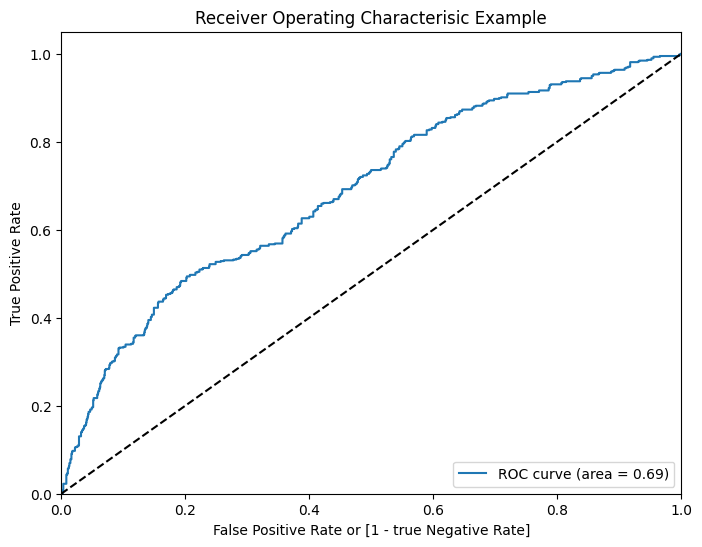

In [86]:
def draw_roc_curve(model, test_X, test_y):
    test_results_df = pd.DataFrame({'actual': test_y})
    test_results_df = test_results_df.reset_index()

    predict_proba_df = pd.DataFrame(model.predict_proba(test_X))
    test_results_df['chd_1'] = predict_proba_df.iloc[:, 1:2]

    fpr, tpr, thresholds = metrics.roc_curve(test_results_df.actual, test_results_df.chd_1, drop_intermediate=False)

    auc_score = metrics.roc_auc_score(test_results_df.actual, test_results_df.chd_1)

    plt.figure(figsize=(8, 6))

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)

    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate or [1 - true Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterisic Example')
    plt.legend(loc='lower right')
    plt.show()

    return auc_score, fpr, tpr, thresholds


_, _, _, _ = draw_roc_curve(logit, test_X, test_y)

**K-Nearest Neighbours (KNN) Algorithms**

KNN algorithms finds observations in the training set, which are similar to the new observation. These observations are called neighbours. For better accuracy, a set of neighbours (K) can be considered for classifying a new observation. The class for the new observation can be predicted to be same class that majority of the neighbours belong to.

Default values to run KNN algorithms
1. n_neighbors = 5
2. metric = 'minkowski'

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(train_X, train_y)

KNeighborsClassifier()

**KNN Accuracy**

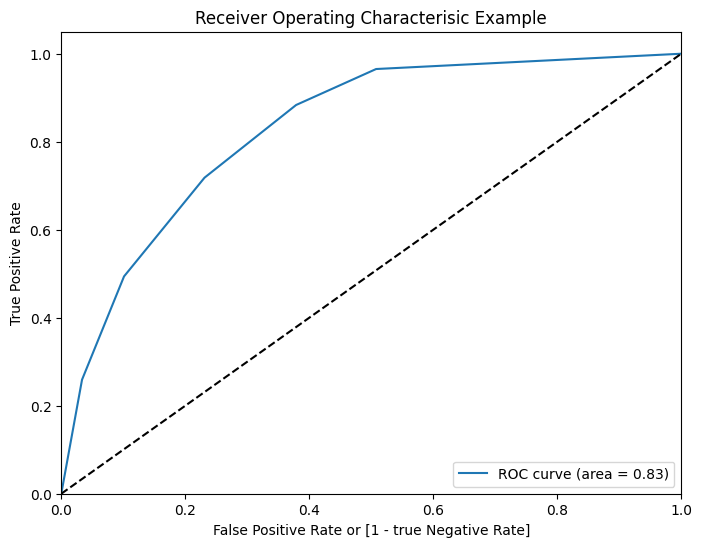

In [91]:
_, _, _, _ = draw_roc_curve(knn_clf, test_X, test_y)

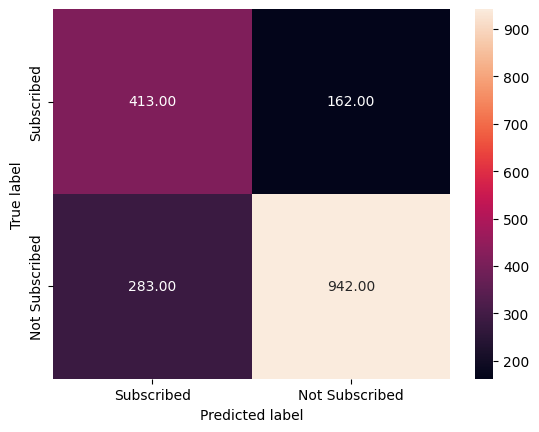

In [92]:
pred_y = knn_clf.predict(test_X)
draw_cm(test_y, pred_y)

In [93]:
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1225
           1       0.59      0.72      0.65       575

    accuracy                           0.75      1800
   macro avg       0.72      0.74      0.73      1800
weighted avg       0.77      0.75      0.76      1800



**GridSearch for Optimal Parameters**

In [94]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'n_neighbors': range(5, 10), 'metric': ['canberra', 'euclidean', 'minkowski']}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=10, scoring='roc_auc')

clf.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

In [95]:
clf.best_score_

np.float64(0.836246922936153)

In [96]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 5}

In [99]:
clf.cv_results_

{'mean_fit_time': array([0.07158968, 0.00650949, 0.00517859, 0.00445883, 0.00427942,
        0.00454917, 0.00522654, 0.00680659, 0.0053302 , 0.00504706,
        0.0046319 , 0.00479922, 0.00509205, 0.00520766, 0.00518086]),
 'std_fit_time': array([0.18108364, 0.00348085, 0.00146297, 0.00060606, 0.0002268 ,
        0.0004798 , 0.00095082, 0.00636691, 0.00176208, 0.00104995,
        0.00077149, 0.00092885, 0.00120617, 0.00181685, 0.00111839]),
 'mean_score_time': array([0.15817924, 0.08950465, 0.08971615, 0.08256724, 0.07871437,
        0.04757891, 0.04784708, 0.0526583 , 0.04858589, 0.04888408,
        0.0476342 , 0.04428415, 0.04710491, 0.04743998, 0.05163236]),
 'std_score_time': array([0.18653526, 0.01539176, 0.01302925, 0.0066094 , 0.00251069,
        0.00499343, 0.00374698, 0.01173659, 0.00471299, 0.00490512,
        0.00681594, 0.00107944, 0.00527223, 0.00422117, 0.00886766]),
 'param_metric': masked_array(data=['canberra', 'canberra', 'canberra', 'canberra',
                    'c

**Random Forest**

The hyperparameters in a Random Forest model are:
1. Number of decision Trees
2. Number of records and features to be sampled.
3. Depth and search criteria (Gini impurity index or entropy)

**Building Random Forest Model**

In [100]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(max_depth=10, n_estimators=10)
radm_clf.fit(train_X, train_y)

RandomForestClassifier(max_depth=10, n_estimators=10)

Now we find the ROC AUC score and draw the ROC curve.

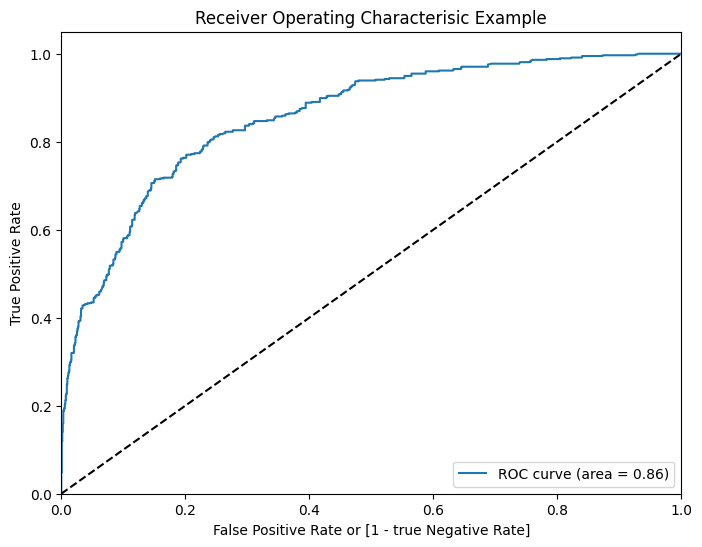

In [101]:
_, _, _, _ = draw_roc_curve(radm_clf, test_X, test_y)

**Grid Search for Optimal Parameters**

In [102]:
tuned_parameters = [{'max_depth': [10, 15], 'n_estimators': [10, 20], 'max_features': ['sqrt', 0.2]}]

radm_clf = RandomForestClassifier()

clf = GridSearchCV(radm_clf, tuned_parameters, cv=5, scoring='roc_auc')

clf.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [103]:
clf.best_score_

np.float64(0.9403369685474947)

In [104]:
clf.best_params_

{'max_depth': 15, 'max_features': 0.2, 'n_estimators': 20}

**Building Final Model with Optimal Parameter Values**

In [109]:
radm_clf = RandomForestClassifier(max_depth=15, n_estimators=20, max_features=0.2)

radm_clf.fit(train_X, train_y)

RandomForestClassifier(max_depth=15, max_features=0.2, n_estimators=20)

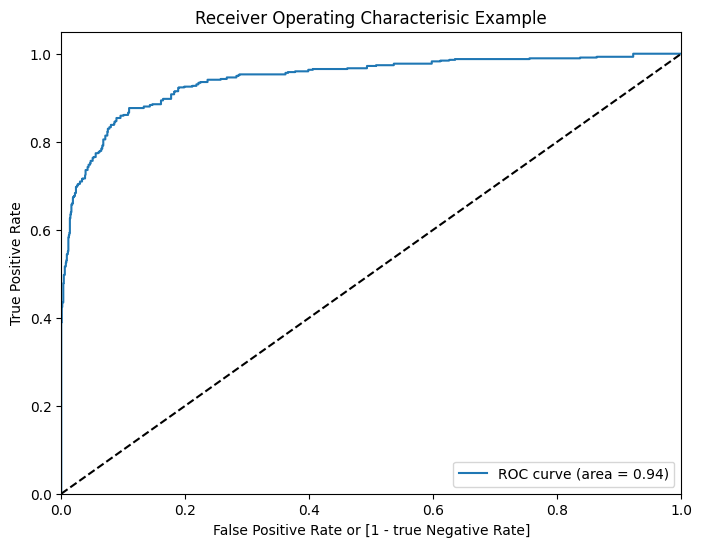

In [110]:
_, _, _, _ = draw_roc_curve(clf, test_X, test_y)

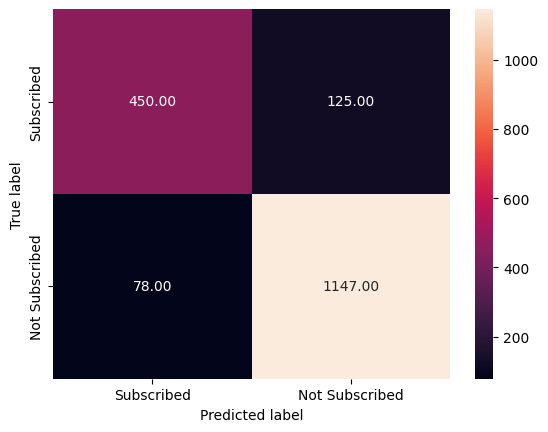

In [111]:
pred_y = radm_clf.predict(test_X)
draw_cm(test_y, pred_y)

In [112]:
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1225
           1       0.85      0.78      0.82       575

    accuracy                           0.89      1800
   macro avg       0.88      0.86      0.87      1800
weighted avg       0.89      0.89      0.89      1800



**Finding Important Features**

<Axes: xlabel='importance', ylabel='feature'>

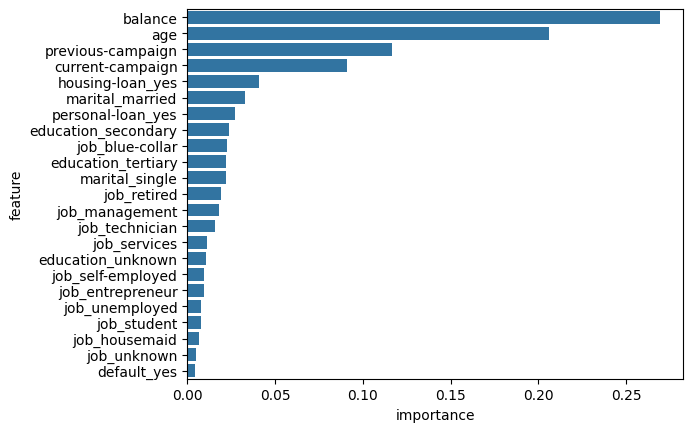

In [114]:
import numpy as np

feature_rank = pd.DataFrame({'feature': train_X.columns, 'importance': radm_clf.feature_importances_})

feature_rank = feature_rank.sort_values('importance', ascending=False)

sn.barplot(y='feature', x='importance', data=feature_rank)

In [115]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100
feature_rank.head(10)

,feature,importance,cumsum
1,balance,0.269021,26.902052
0,age,0.206235,47.525517
3,previous-campaign,0.116426,59.168077
2,current-campaign,0.091125,68.280591
21,housing-loan_yes,0.040642,72.344826
15,marital_married,0.032632,75.608033
22,personal-loan_yes,0.027350,78.343021
17,education_secondary,0.023715,80.714558
4,job_blue-collar,0.022898,83.004357
18,education_tertiary,0.021961,85.200438


**Boosting**

**AdaBoost**

In [116]:
from sklearn.ensemble import AdaBoostClassifier

logreg_clf = LogisticRegression()

ada_clf = AdaBoostClassifier(logreg_clf, n_estimators=50)

ada_clf.fit(train_X, train_y)

AdaBoostClassifier(estimator=LogisticRegression())

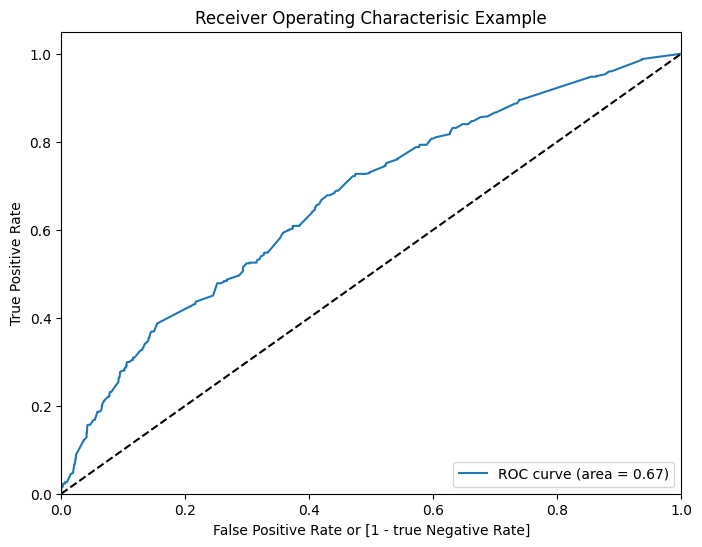

In [117]:
_, _, _, _ = draw_roc_curve(ada_clf, test_X, test_y)

**Gradient Boosting**

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

gboost_clf = GradientBoostingClassifier(n_estimators=500, max_depth=10)
gboost_clf.fit(train_X, train_y)


GradientBoostingClassifier(max_depth=10, n_estimators=500)

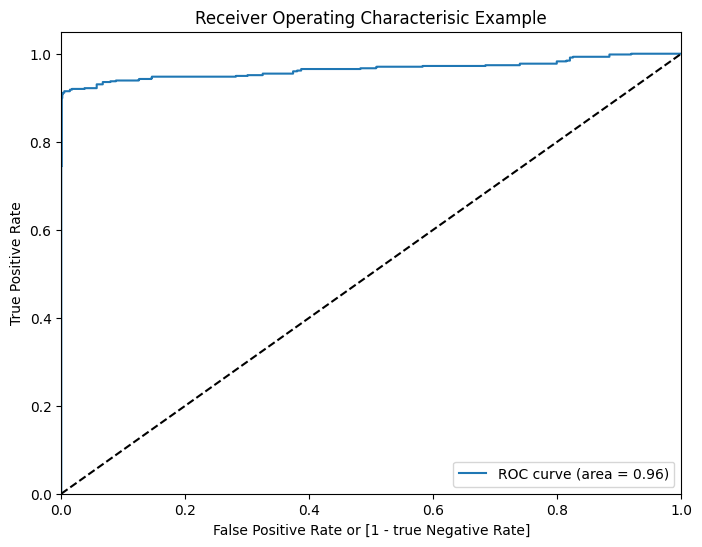

In [119]:
_, _, _, _ = draw_roc_curve(gboost_clf, test_X, test_y)

It is the best model we have built so far. But is it overfitting? We will run a 10-fold cross-validation to check the model's accuracy.

In [125]:
from sklearn.model_selection import cross_val_score

gboost_clf = GradientBoostingClassifier(n_estimators=500, max_depth=10)
cv_scores = cross_val_score(gboost_clf, train_X, train_y, cv=10, scoring='roc_auc')

In [126]:
print(cv_scores)
print("Mean Accuracy: ", np.mean(cv_scores), " with standard deviation of: ", np.std(cv_scores))

[0.98221704 0.97639072 0.97742932 0.95906373 0.96081163 0.96556512
 0.95120042 0.97359319 0.95428038 0.98210093]
Mean Accuracy:  0.9682652500092737  with standard deviation of:  0.010948831234291957


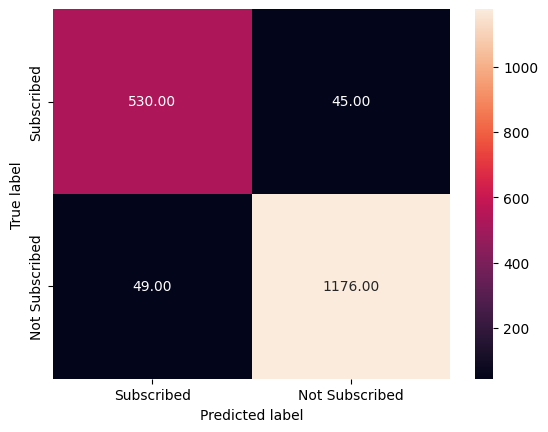

In [128]:
gboost_clf.fit(train_X, train_y)
pred_y = gboost_clf.predict(test_X)
draw_cm(test_y, pred_y)

In [129]:
print(metrics.classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1225
           1       0.92      0.92      0.92       575

    accuracy                           0.95      1800
   macro avg       0.94      0.94      0.94      1800
weighted avg       0.95      0.95      0.95      1800



<Axes: xlabel='importance', ylabel='feature'>

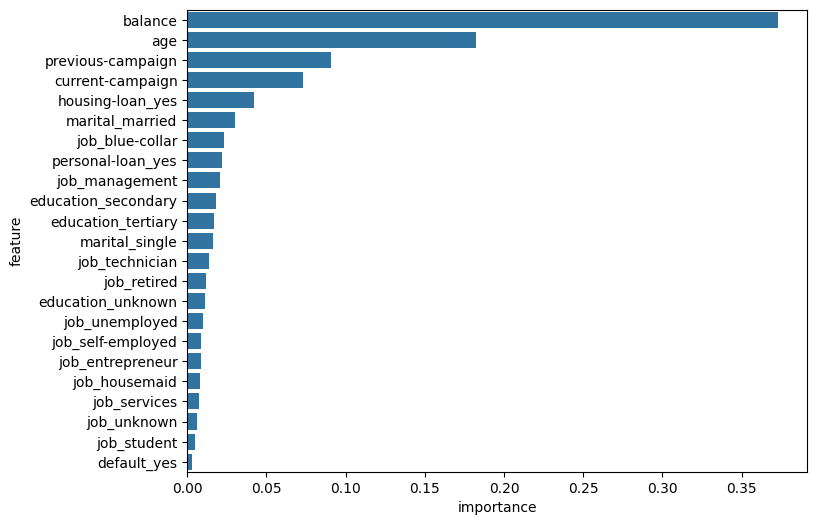

In [132]:
feature_rank = pd.DataFrame({'feature': train_X.columns, 'importance': gboost_clf.feature_importances_})

feature_rank = feature_rank.sort_values('importance', ascending=False)
plt.figure(figsize=(8, 6))
sn.barplot(y='feature', x='importance', data=feature_rank)

In [3]:
import os
import shutil

# Make the .kaggle directory
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Move the file from Downloads
shutil.move("C:/Users/rahak/Downloads/kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))



'C:\\Users\\rahak/.kaggle/kaggle.json'